In [2]:
%notebook matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as ps


In [3]:
# A dictionary of movie critics and their ratings of a small
# set of movies
critics={
    'Lisa Rose': {
            'Lady in the Water': 2.5,
            'Snakes on a Plane': 3.5,
             'Just My Luck': 3.0,
            'Superman Returns': 3.5,
            'You, Me and Dupree': 2.5,
             'The Night Listener': 3.0
    },
    'Gene Seymour': {
            'Lady in the Water': 3.0, 
            'Snakes on a Plane': 3.5,
             'Just My Luck': 1.5,
            'Superman Returns': 5.0, 
            'The Night Listener': 3.0,
             'You, Me and Dupree': 3.5
    },
    'Michael Phillips': {
            'Lady in the Water': 2.5, 
            'Snakes on a Plane': 3.0,
             'Superman Returns': 3.5,
            'The Night Listener': 4.0
    },
    'Claudia Puig': {
            'Snakes on a Plane': 3.5, 
             'Just My Luck': 3.0,
             'The Night Listener': 4.5, 
            'Superman Returns': 4.0,
             'You, Me and Dupree': 2.5
    },
    'Mick LaSalle':{
            'Lady in the Water': 3.0, 
            'Snakes on a Plane': 4.0,
             'Just My Luck': 2.0, 
            'Superman Returns': 3.0,
            'The Night Listener': 3.0,
             'You, Me and Dupree': 2.0
    },
    'Jack Matthews': {
            'Lady in the Water': 3.0,
             'Snakes on a Plane': 4.0,
             'The Night Listener': 3.0,
             'Superman Returns': 5.0,
             'You, Me and Dupree': 3.5
    },
    'Toby': {
            'Snakes on a Plane':4.5,
             'You, Me and Dupree':1.0,
             'Superman Returns':4.0
    }
}

In [4]:
critics['Lisa Rose']['Lady in the Water']


2.5

In [5]:
# Finding Similar Users

In [6]:
# Euclidean Distance
snakes='Snakes on a Plane'
dupree='You, Me and Dupree'
Snakes=[]
Dupree=[]
Names=[]
for x in critics:
    Names.append(x)
    if(snakes in critics[x] and dupree in critics[x]):
        Snakes.append(critics[x][snakes])
        Dupree.append(critics[x][dupree])

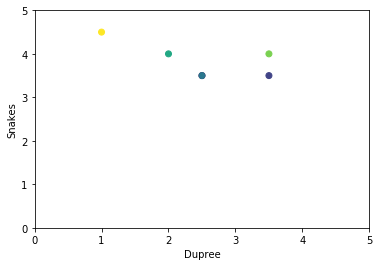

In [7]:
plt.figure()
plt.scatter(x=Dupree,y=Snakes,c=[0,1,2,3,4,5])
ax=plt.gca()
ax.set_xlim(0,5)
ax.set_ylim(0,5)
plt.xlabel('Dupree')
plt.ylabel('Snakes')
plt.show();

In [8]:
from math import sqrt
#Returns a distance- based Similarity Score for person 1 and 
#person2
def sim_distance(prefs,person1,person2):
    # list of shared Items
    si = {}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
            
    # if no ratings is common, return 0
    if len(si)==0:
        return 0
    
    sum_of_squares = [ pow(prefs[person1][item]-prefs[person2][item],2)
                      for item in prefs[person1] if item in prefs[person2]]
    
    return 1/(1+sum(sum_of_squares))

In [9]:
sim_distance(critics,'Lisa Rose','Gene Seymour')

0.14814814814814814

In [10]:
# Pearson Score
#One interesting aspect of using the Pearson score is that it corrects for grade inflation. 
#If one critic is inclined to give higher scores than the other, there can still be
#perfect correlation if the difference between their scores is consistent. The Euclidean
#distance score described earlier will say that two critics are dissimilar because one is
#consistently harsher than the other, even if their tastes are very similar.

In [11]:
# Returns the Pearson Correlation coefficient
def sim_pearson(prefs,p1,p2):
    si={} # Items rated by both users
    for item in prefs[p1]:
        if item in prefs[p2]:
            si[item]=1
    n = len(si) # number of items rated by both users
    if n==0:  return 0
    
    # individual sums
    sum1 =sum([prefs[p1][it] for it in si])
    sum2 =sum([prefs[p2][it] for it in si])
        
    # sum of squares
    sum1Sq =sum([ pow(prefs[p1][it],2) for it in si])
    sum2Sq =sum([ pow(prefs[p2][it],2) for it in si])
    
    # product sum
    pSum = sum([prefs[p1][it]*prefs[p2][it]  for it in si  ])

    # Calcualte Pearson Score
    num = pSum- (sum1*sum2/n)
    den = sqrt ((sum1Sq - pow(sum1,2)/n) * (sum2Sq-pow(sum2,2)/n) )
    
    if den==0: return 0
    return num/den


In [12]:
print(sim_pearson(critics,'Lisa Rose','Gene Seymour'))

0.39605901719066977


In [13]:
# Ranking the Critics
# Which movie critics have tastes simliar to person so that
# I know whose advice I should take when deciding on a movie. 

def topMatches(prefs,person,n=5,similarity = sim_pearson):
    scores = [ (similarity(prefs,person,other),other) for other in prefs if other!=person]
    
    scores.sort()
    scores.reverse() # top match at top
    return scores[0:n]

In [14]:
topMatches(critics,'Toby',n=3)

# Top Person , indicates the similar taste in movies , so I should take advice from top matches only

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig')]

In [71]:
# of every other user's rankings
def getRecommendations(prefs,person,similarity=sim_pearson):
    totals={}
    simSums={}
    for other in prefs:
         # don't compare me to myself
         if other==person: continue
        sim=similarity(prefs,person,other)
         # ignore scores of zero or lower
        if sim<=0: continue
        for item in prefs[other]:
             # only score movies I haven't seen yet
            if item not in prefs[person] or prefs[person][item]==0:
                 # Similarity * Score
                totals.setdefault(item,0)
                totals[item]+=prefs[other][item]*sim
                 # Sum of similarities
                simSums.setdefault(item,0)
                simSums[item]+=sim
     # Create the normalized list
    rankings=[(total/simSums[item],item) for item,total in totals.items( )]
     # Return the sorted list
    rankings.sort( )
    rankings.reverse()
    return rankings

IndentationError: unindent does not match any outer indentation level (<ipython-input-71-3ef47ff216c4>, line 8)

In [16]:
getRecommendations(critics,'Toby')

[(3.3477895267131017, 'The Night Listener'),
 (2.8325499182641614, 'Lady in the Water'),
 (2.530980703765565, 'Just My Luck')]

In [17]:
# Here , we have explored the similarity of two persons on the basis of movies they have seen
# Similar calculations can be carried out to compare similarities of two movies
# So, we can recommend the movies similar to already watched movies


In [21]:
def tranformPrefs(prefs):
    result={}
    for person in prefs:
        for item in prefs[person]:
            result.setdefault(item,{})
            
            result[item][person] = prefs[person][item]
    return result

In [26]:
movies = tranformPrefs(critics)
topMatches(movies,'Superman Returns')

[(0.6579516949597695, 'You, Me and Dupree'),
 (0.4879500364742689, 'Lady in the Water'),
 (0.11180339887498941, 'Snakes on a Plane'),
 (-0.1798471947990544, 'The Night Listener'),
 (-0.42289003161103106, 'Just My Luck')]

In [30]:
## Here we are twisting sides and getting recommended critics for a movie
getRecommendations(movies,'Just My Luck')  

[(4.0, 'Michael Phillips'), (3.0, 'Jack Matthews')]

## Item-Based Filtering

In [31]:
#The general technique is to precompute the most similar items for each item. 
#Then, when you wish to make recommendations to a user, you look at his top-rated
#items and create a weighted list of the items most similar to those. 

In [32]:
# BUILDING THE ITEM COMPARISON DATASET

In [64]:
def calculateSimilarItems(prefs,n=10):
     # Create a dictionary of items showing which other items they
     # are most similar to.
     result={}
     # Invert the preference matrix to be item-centric
     itemPrefs=tranformPrefs(prefs)
     c=0
     for item in itemPrefs:
         # Status updates for large datasets
         c+=1
         if c%100==0: print( "%d / %d" % (c,len(itemPrefs)) )
         # Find the most similar items to this one
         scores=topMatches(itemPrefs,item,n=n,similarity=sim_distance)
         result[item]=scores
     return result

In [67]:
# Similar Movies to Superman Returns
calculateSimilarItems(critics)['Superman Returns']

[(0.16666666666666666, 'Snakes on a Plane'),
 (0.10256410256410256, 'The Night Listener'),
 (0.09090909090909091, 'Lady in the Water'),
 (0.06451612903225806, 'Just My Luck'),
 (0.05333333333333334, 'You, Me and Dupree')]

In [68]:
# using the same weighted sum calculation ,we can calculate Recommended items and can give recommendations

In [69]:
def getRecommendedItems(prefs,itemMatch,user):
     userRatings=prefs[user]
     scores={}
     totalSim={}
     # Loop over items rated by this user
     for (item,rating) in userRatings.items( ):
         # Loop over items similar to this one
         for (similarity,item2) in itemMatch[item]:
             # Ignore if this user has already rated this item
             if item2 in userRatings: continue
             # Weighted sum of rating times similarity
             scores.setdefault(item2,0)
             scores[item2]+=similarity*rating
             # Sum of all the similarities
             totalSim.setdefault(item2,0)
             totalSim[item2]+=similarity
     # Divide each total score by total weighting to get an average
     rankings=[(score/totalSim[item],item) for item,score in scores.items( )]
     # Return the rankings from highest to lowest
     rankings.sort( )
     rankings.reverse( )
     return rankings

In [70]:
itemsim = calculateSimilarItems(critics)
getRecommendedItems(critics,itemsim,'Toby')

[(3.182634730538922, 'The Night Listener'),
 (2.5983318700614575, 'Just My Luck'),
 (2.4730878186968837, 'Lady in the Water')]